In [44]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = os.path.join("data", "mouse_drug_data.csv")
clinical_trial_data = os.path.join("data", "clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mdd_df = pd.read_csv(mouse_drug_data)
ctd_df = pd.read_csv(clinical_trial_data)
# Combine the data into a single dataset
df = mdd_df.merge(ctd_df)

# Display the data table for preview
df


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [88]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
mean_tumor_volume
# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame({"Tumor Volume (mm3)": mean_tumor_volume}).reset_index()



# Preview DataFrame
mean_tumor_volume_df
mean_df = mean_tumor_volume_df
mean_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [46]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
error_df = pd.DataFrame({"Tumor Volume (mm3)": standard_error}).reset_index()
# Preview DataFrame
error_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [47]:
# Minor Data Munging to Re-Format the Data Frames
mean_df = mean_df.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
mean_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


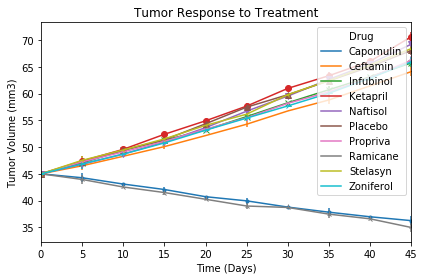

In [48]:
# Generate the Plot (with Error Bars)
yerr = error_df["Tumor Volume (mm3)"]
markers = ['.', ',', 'x', 'o', 'v', '^', '1', '2', '3', '4']
ax = mean_df.plot(yerr = yerr)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.tight_layout()
plt.savefig("Pyma_plot.png")
# Save the Figure



In [98]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [49]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
met_site_df = pd.DataFrame({"Metastatic Sites":met_site}).reset_index()
# Preview DataFrame
met_site_df = met_site_df.set_index(["Drug", "Timepoint"])
met_site_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [61]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_standard_error = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
met_site_standard_error_df = pd.DataFrame({"Metastatic Sites": met_site_standard_error}).reset_index()
# Preview DataFrame

#met_site_standard_error_df = met_site_standard_error_df.set_index(["Drug", "Timepoint"])
met_site_standard_error_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [54]:
# Minor Data Munging to Re-Format the Data Frames
met_site_df = met_site_df.pivot_table(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
met_site_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


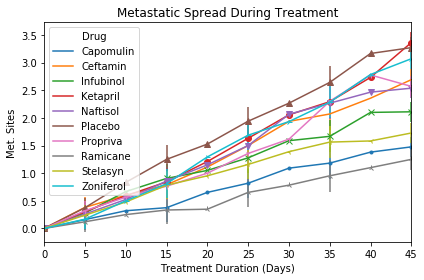

In [63]:
# Generate the Plot (with Error Bars)
yerr = met_site_standard_error_df["Metastatic Sites"]
markers = ['.', ',', 'x', 'o', 'v', '^', '1', '2', '3', '4']
ax = met_site_df.plot(yerr = yerr)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.tight_layout()
plt.savefig("pyma_meta_plot.png")
# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [67]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mouse_count_df = pd.DataFrame({"Mouse Count":mouse_count}).reset_index()
# Preview DataFrame
mouse_count_df

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [68]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df = mouse_count_df.pivot(index = "Timepoint", columns = "Drug", values = "Mouse Count")
# Preview the Data Frame
mouse_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


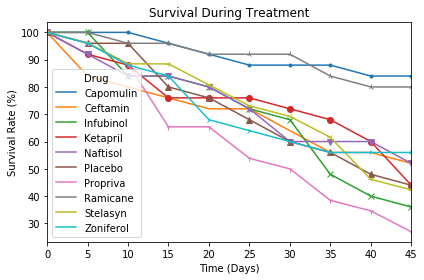

In [82]:
# Generate the Plot (Accounting for percentages)
markers = ['.', ',', 'x', 'o', 'v', '^', '1', '2', '3', '4']
mouse_count_percentage_df = mouse_count_df.div(mouse_count_df.iloc[0])*100
ax = mouse_count_percentage_df.plot()
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.tight_layout()
plt.savefig("pyma_mouse_plot.png")
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [147]:
# Calculate the percent changes for each drug
first = mean_df.groupby("Drug")["Tumor Volume (mm3)"].first()
last = mean_df.groupby("Drug")["Tumor Volume (mm3)"].last()
percent_change = ((last - first)/first)*100
percent_change_df = pd.DataFrame({"Percent Change":percent_change})
# Display the data to confirm
percent_change_df

,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

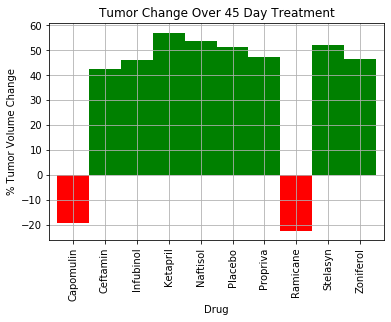

In [162]:
# Store all Relevant Percent Changes into a Tuple
percent_change = tuple(percent_change)
percent_change

# Splice the data between passing and failing drugs
passing = []
failing = []

for i in (percent_change):
    if i > 0:
        failing.append(i)
    if i < 0:
        passing.append(i)

# Orient widths. Add labels, tick marks, etc. 
#labels = mean_df["Drug"].unique().tolist()
percent_change_df['Percent Change'] > 0
percent_change_df["Percent Change"].plot(kind = "bar", width = 1, color=(percent_change_df['Percent Change'] > 0).map({True: 'g',
                                                    False: 'r'}))
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid(zorder = 1)
# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig("pyma_tumor_change.png")

# Show the Figure


![Metastatic Spread During Treatment](../Images/change.png)